# Figure 5: SPT5 depletion during late embryogenesis leads to different responses depending on the transcriptional state of the gene

### Figure 5B: Heatmap/metaprofiles depletion

In [3]:
import pandas as pd
import numpy as np
import gzip
from tqdm import tqdm  # For progress tracking

#############################################################
### Script for taking TSS centered deeptools heatmaps 
###     set bins to 0 after TES 
#############################################################


def process_matrix_3h_comparison(input_file, output_file):
    """
    Process a 3-hour comparison matrix by setting all values beyond the TES to NaN for both time points.

    Args:
        input_file (str): Path to the input .gz matrix file.
        output_file (str): Path to save the modified .gz matrix file.
    """
    # Open the .gz file and load the matrix
    with gzip.open(input_file, 'rt') as f:
        # Read the first line (header)
        header = f.readline().strip()
        
        # Load the remaining data into a DataFrame
        df = pd.read_csv(f, sep="\t", header=None)

    # Iterate over each gene (row) in the DataFrame
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing genes"):
        gene_start = int(row[1])
        gene_end = int(row[2])   
        
        gene_length = gene_end - gene_start
        
        # Determine the bin corresponding to the TES position (10 bp per bin)
        tes_bin_index = (gene_length + 1000) // 10

        # Set values after the TES for both time points
        if tes_bin_index < 600:  # Only affect bin columns
            
            # For 1h
            first_time_bin_start = tes_bin_index + 6
            first_time_bin_end = 6 + 600  
            
            # For 3h
            second_time_bin_start = tes_bin_index + 6 + 600
            second_time_bin_end = 6 + 1200  

            # Set bins beyond TES to 0 for both time points
            df.iloc[index, first_time_bin_start:first_time_bin_end] = np.nan
            df.iloc[index, second_time_bin_start:second_time_bin_end] = np.nan

    # Save the modified matrix to a new .gz file with the header
    with gzip.open(output_file, 'wt') as f_out:
        f_out.write(header + '\n')  # Write header to the output file
        df.to_csv(f_out, sep="\t", header=False, index=False)

  
directory = "/home/mayer/92_SPT4_SPT5/Depletion_CUTnTag/analysis/depletion_heatmap/genes_active/grouped_sorted_TSS/"
#--------------------10-12h----2h-----------------
# Pol2ser5
matrix_path_1012h_Pol2ser5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1012h_Pol2ser5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1012h_Pol2ser5, matrix_output_path_1012h_Pol2ser5)

# Pol2ser2
matrix_path_1012h_Pol2ser2 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1012h_Pol2ser2 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1012h_Pol2ser2, matrix_output_path_1012h_Pol2ser2)

# SPT5
matrix_path_1012h_SPT5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1012h_SPT5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1012h_SPT5, matrix_output_path_1012h_SPT5)

# NELF
matrix_path_1012h_NELF = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1012h_NELF = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1012h_NELF, matrix_output_path_1012h_NELF)

#--------------------18-20h----2h-----------------

# Pol2ser5
matrix_path_1820h_Pol2ser5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1820h_Pol2ser5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1820h_Pol2ser5, matrix_output_path_1820h_Pol2ser5)

# Pol2ser2
matrix_path_1820h_Pol2ser2 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1820h_Pol2ser2 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1820h_Pol2ser2, matrix_output_path_1820h_Pol2ser2)

# SPT5
matrix_path_1820h_SPT5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1820h_SPT5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1820h_SPT5, matrix_output_path_1820h_SPT5)

# NELF
matrix_path_1820h_NELF = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn.gz"
matrix_output_path_1820h_NELF = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
process_matrix_3h_comparison(matrix_path_1820h_NELF, matrix_output_path_1820h_NELF)




Processing genes: 100%|██████████| 10004/10004 [06:20<00:00, 26.28it/s]


Plot metaprofiles

Delta 1h x-axis intersection at: 390 bp, Value: 0.004052933736173679


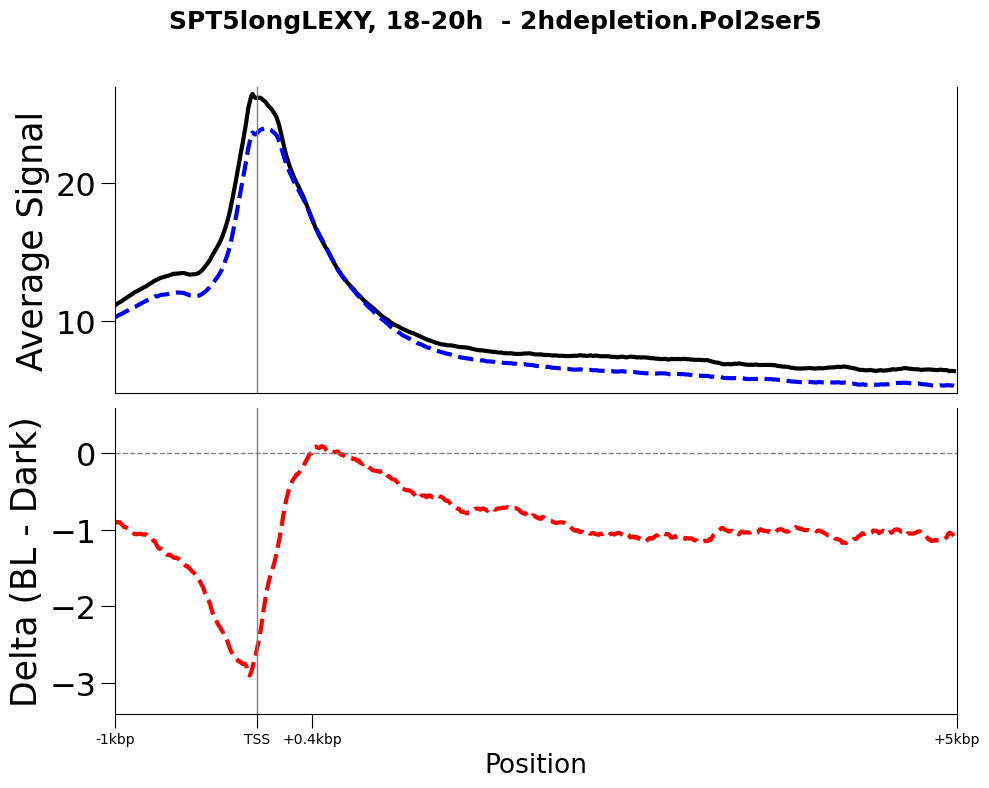

Delta 1h x-axis intersection at: 1760 bp, Value: -0.0088345997844164


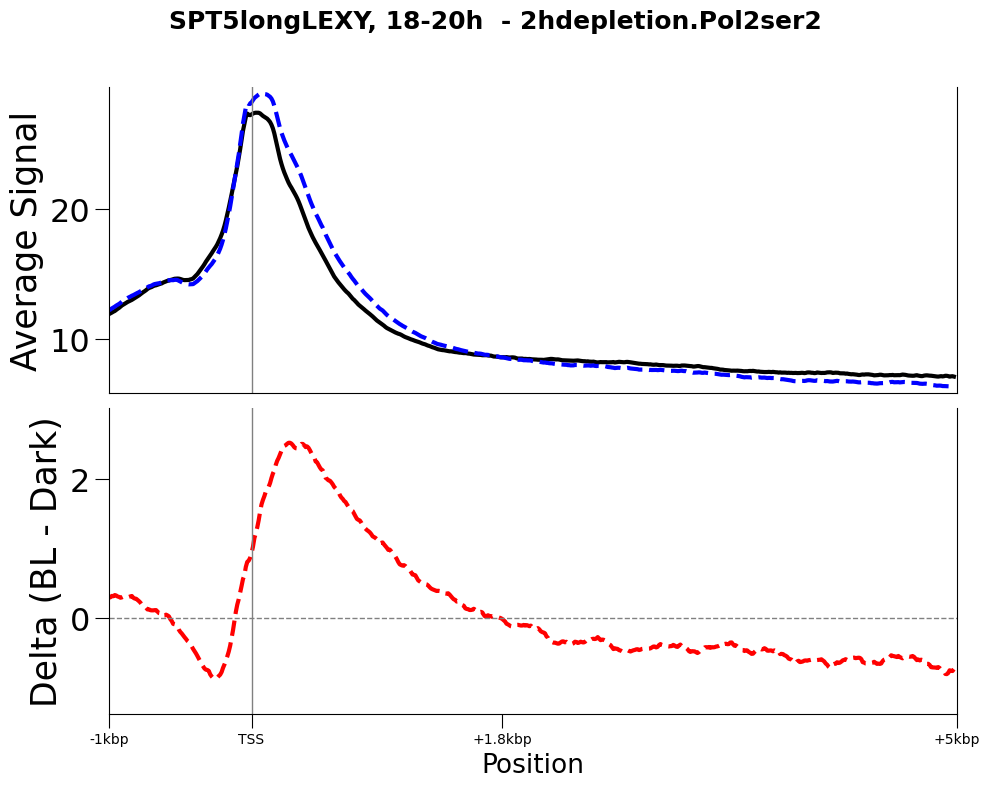

Delta 1h x-axis intersection at: 0 bp, Value: -8.445846898061163


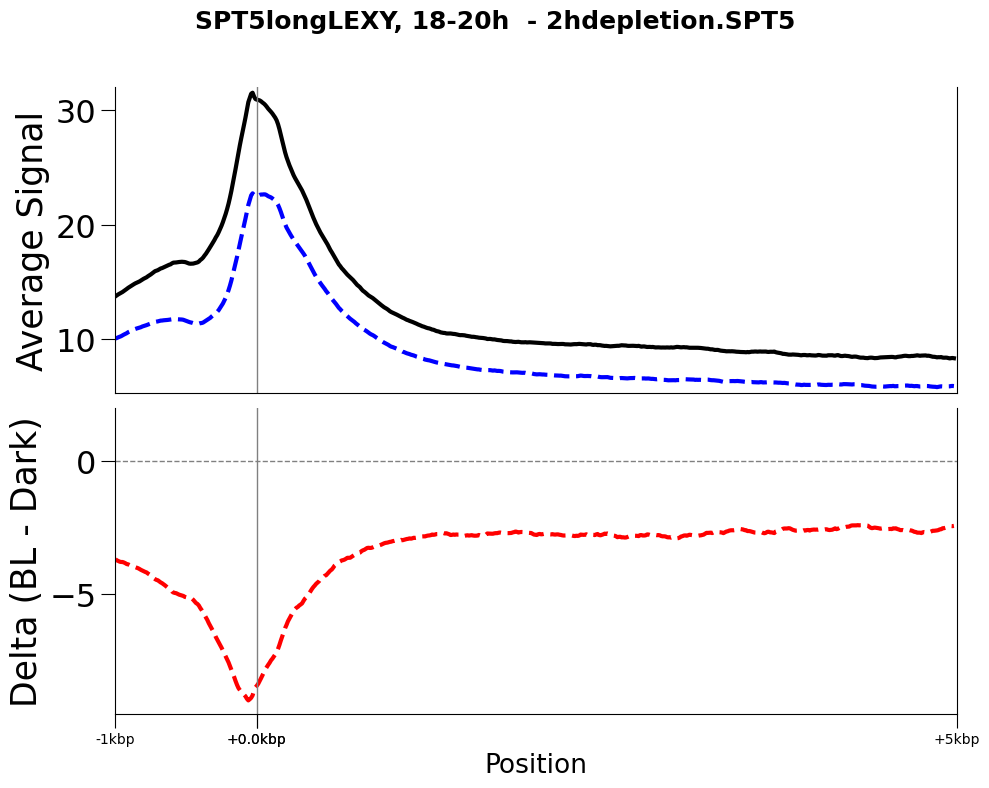

Delta 1h x-axis intersection at: 0 bp, Value: -4.2726189370251895


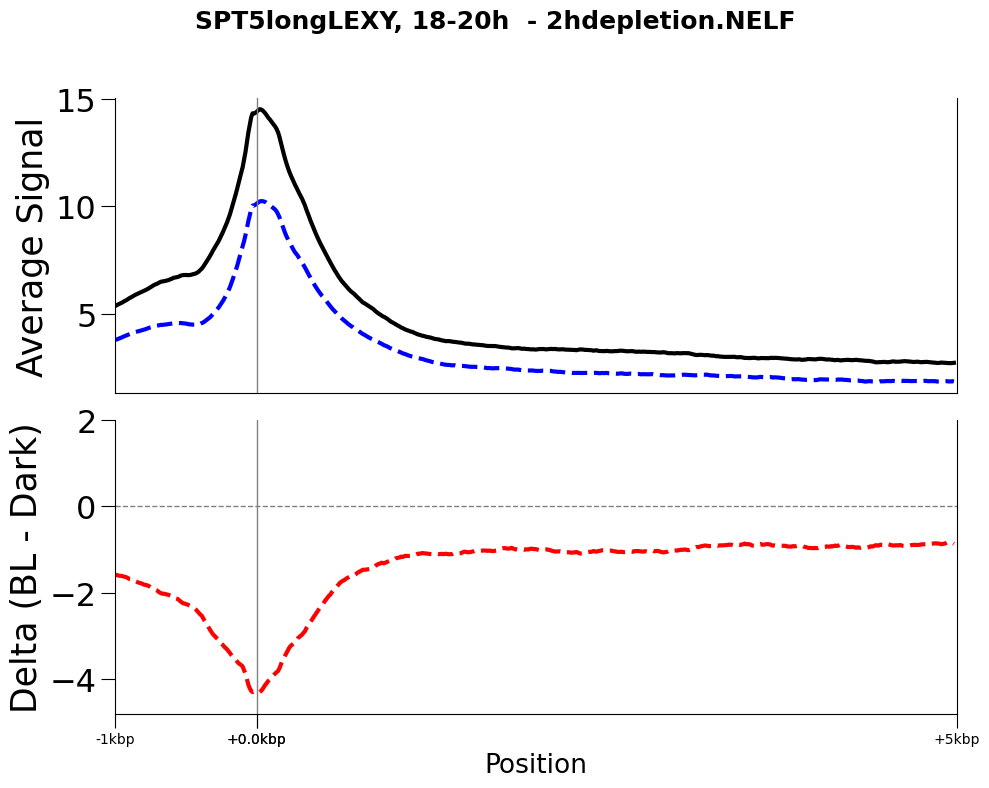

Delta 1h x-axis intersection at: 0 bp, Value: 4.720799801639717


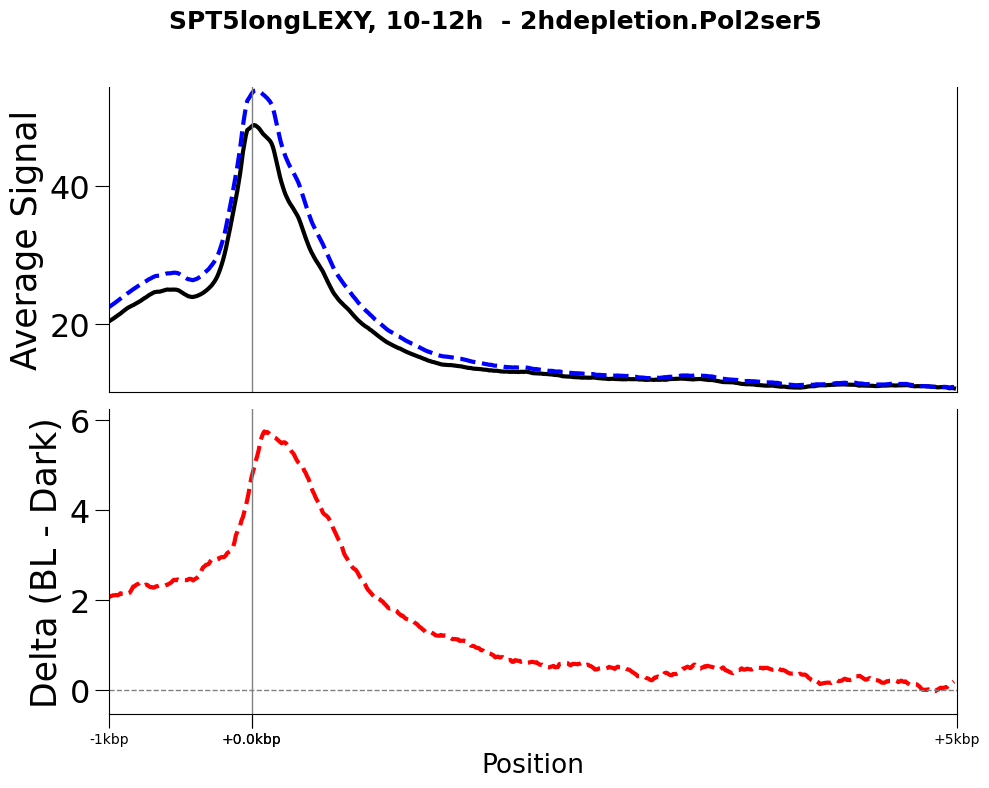

Delta 1h x-axis intersection at: 1360 bp, Value: -0.016600873787856175


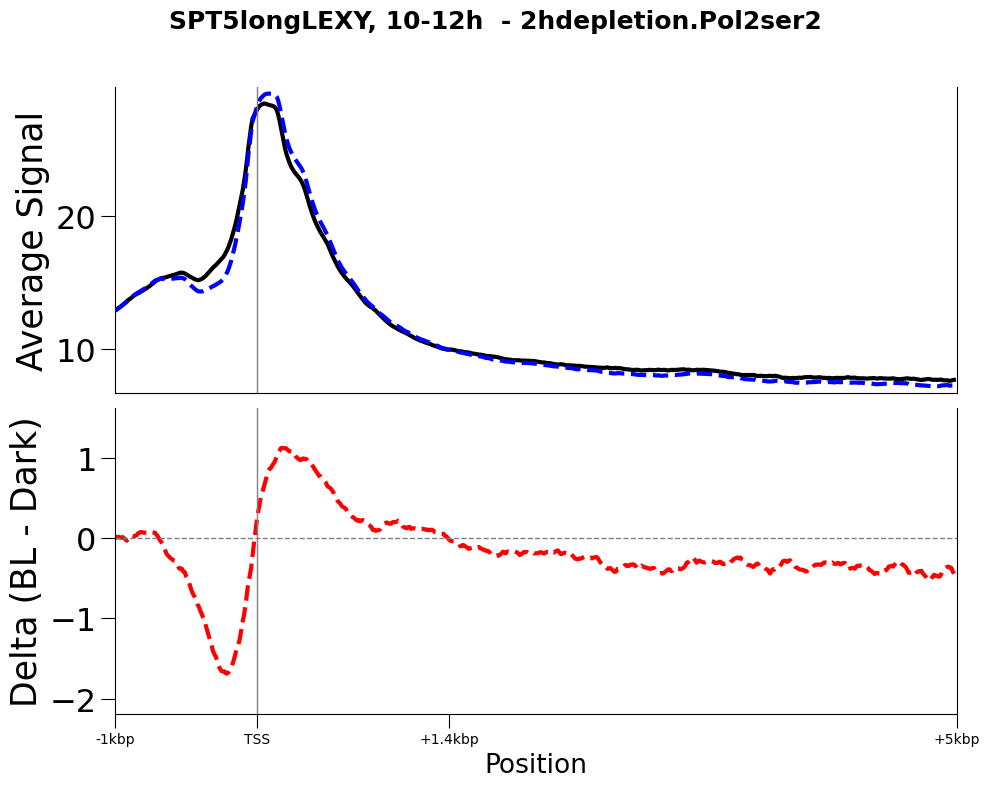

Delta 1h x-axis intersection at: 0 bp, Value: -13.98674746726631


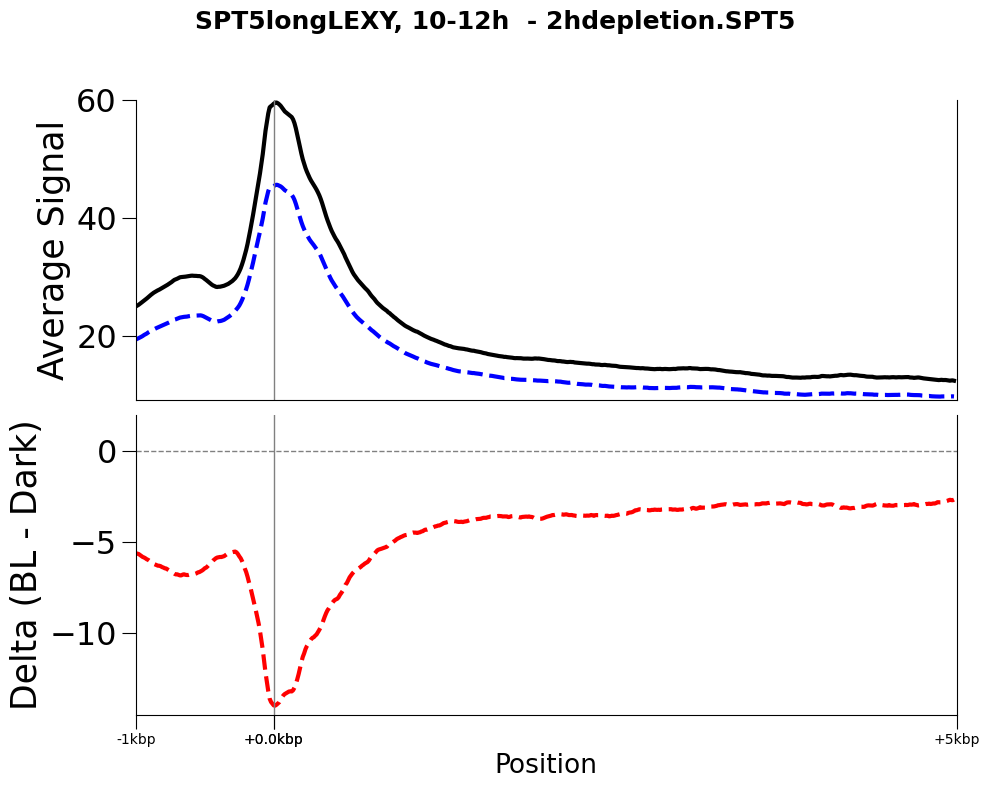

Delta 1h x-axis intersection at: 0 bp, Value: -2.295142513378117


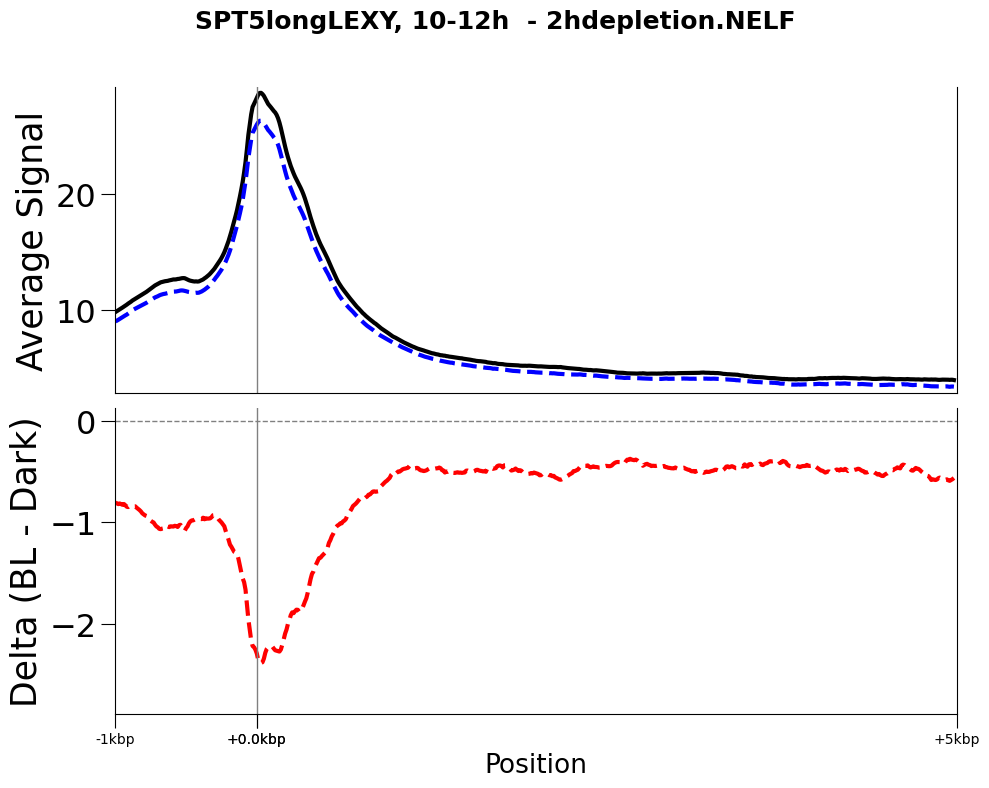

In [8]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import json
import os
import numpy as np
from tqdm import tqdm  # For progress tracking


def create_delta_df(dark_df, blue_light_df):
    """Create a DataFrame for the Delta (Blue Light - Dark)."""
    # Convert data to numeric and calculate delta for each row
    delta_df = blue_light_df.apply(pd.to_numeric, errors='coerce') - dark_df.apply(pd.to_numeric, errors='coerce')

    # Assign new column names to delta_df for clarity
    delta_df.columns = [f'Delta_{i}' for i in range(delta_df.shape[1])]

    return delta_df

def load_matrix_data(matrix_path):
    """Load matrix data and header information from the gzipped file."""
    with gzip.open(matrix_path, 'rt') as f:
        header = f.readline()  # First line is the header

    header_data = json.loads(header.strip('@'))  # Remove '@' and parse JSON

    # Extract sample labels and boundaries
    sample_labels = header_data["sample_labels"]
    sample_boundaries = header_data["sample_boundaries"]

    # Load the actual matrix data
    matrix_df = pd.read_csv(matrix_path, sep='\t', compression='gzip', skiprows=1, header=None)

    return matrix_df, sample_labels, sample_boundaries

def split_samples(matrix_df, sample_labels, sample_boundaries):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    gene_metadata = matrix_df.iloc[:, :6]
    
    dark_df = pd.DataFrame()
    blue_light_df = pd.DataFrame()

    for i, sample in enumerate(sample_labels):
        start_idx = sample_boundaries[i]
        end_idx = sample_boundaries[i + 1] if i + 1 < len(sample_boundaries) else None
        # Split columns based on sample type
        if "Dark" in sample:
            dark_df = matrix_df.iloc[:, start_idx+6:end_idx+6]
        elif "BlueLight" in sample:
            blue_light_df = matrix_df.iloc[:, start_idx+6:end_idx+6]

    # Assign column names for clarity
    dark_df.columns = [f'{i}' for i in range(dark_df.shape[1])]
    blue_light_df.columns = [f'{i}' for i in range(blue_light_df.shape[1])]


    return dark_df, blue_light_df

def extract_title_from_filename(matrix_path):
    """Extract and format the plot title from the matrix file path."""
    filename = os.path.basename(matrix_path)
    parts = filename.split('_')
    time_point = parts[1]   # time of depletion eg.: '18-20h'
    depletion = parts[2]    # duration of depletion eg.: '4hdepletion'
    antibody = parts[3]     # antibody eg.: 'SPT5' 
    formatted_depletion = depletion.replace('depletion', 'depletion').replace('h', 'h ')
    final_title = f'{time_point}, {formatted_depletion} - {antibody}'
    return final_title

def plot_data(dark_avg, blue_light_avg_1h, delta_avg_1h, output_path, plot_title, normal_way):
    """Plot the averaged data in two subplots, with Deltas on top, and save the figure."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  

    x = range(len(dark_avg))
    line_width = 3
    frontSize_add = 3

    # First subplot (top): Dark, Blue Light 1h, and Blue Light 3h
    ax1.plot(x, dark_avg, label='Dark', color='black', linestyle='-', linewidth=line_width)
    ax1.plot(x, blue_light_avg_1h, label='Blue Light', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax1.set_ylabel('Average Signal', fontsize=22 + frontSize_add)

    # Dynamic y-axis for Dark and BL
    ax1.set_ylim(min(min(dark_avg), min(blue_light_avg_1h))-0.5,
                 max(max(dark_avg), max(blue_light_avg_1h))+0.5)

    # Second subplot (bottom): Delta (BL 1h - Dark) and Delta (BL 3h - Dark)
    ax2.plot(x, delta_avg_1h, label='Delta (BL - Dark)', color='red', linestyle='--', linewidth=line_width, markeredgecolor='black')
    
    # Dynamic y-axis for Delta with a visible 0-line
    min_delta, max_delta = min(delta_avg_1h)-0.5, max(delta_avg_1h)+0.5

    if max_delta <= 0:  # Only negative values
        ax2.set_ylim(min_delta, 2)
    elif min_delta >= 0:  # Only positive values
        ax2.set_ylim(-2, max_delta)
    else:  # Both positive and negative values
        ax2.set_ylim(min_delta, max_delta)

    # Always show 0-line
    ax2.axhline(0, color='grey', linestyle='--', linewidth=1)

    ax2.set_ylabel('Delta (BL - Dark)', fontsize=22 + frontSize_add)
    
    if normal_way:
        # Find x-axis intersections for delta plots upstream of TSS
        intersection_1h = next((i for i in range(100, len(delta_avg_1h)) if delta_avg_1h.iloc[i] <= 0), 100)
    else:
        # Find x-axis intersections for delta plots downstream of TSS
        intersection_1h = next((i for i in range(100, len(delta_avg_1h)) if delta_avg_1h.iloc[i] >= 0), 100)

    intersection_1h_bp = (intersection_1h*10)-1000

    # Formatierung der kbp-Werte mit einer Nachkommastelle
    intersection_1h_bp_string = f"+{round(intersection_1h_bp / 1000, 1)}kbp" if intersection_1h_bp is not None else "N/A"

    # Print the x-axis intersection values
    print(f'Delta 1h x-axis intersection at: {intersection_1h_bp} bp, Value: {delta_avg_1h.iloc[intersection_1h]}')
   

    # Shared X-axis for both subplots
    ax2.set_xlabel('Position', fontsize=16 + frontSize_add)
    ax1.set_xticks([0, 100, intersection_1h,  595]) #199, 298, 397, 496,
    ax1.set_xticklabels(['-1kbp', 'TSS', intersection_1h_bp_string,  '+5kbp'], fontsize=20 + frontSize_add) 
    ax1.tick_params(axis='y', labelsize=20 + frontSize_add)

    # Set tick size for both x and y axis (length adjusts the tick size)
    ax1.tick_params(axis='x', length=0)  
    ax1.tick_params(axis='y', length=10) 

    ax2.tick_params(axis='x', length=10)  
    ax2.tick_params(axis='y', length=10)  

    # Add TSS and TES lines across both subplots
    for ax in [ax1, ax2]:
        ax.axvline(x=100, color='grey', linewidth=1)  # TSS
        
    ax1.set_xlim(0, 595)
    ax2.set_xlim(0, 595)

    # Adjust appearance
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')
    ax2.set_facecolor('white')
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.tick_params(axis='y', labelsize=20 + frontSize_add)

    # Add title above the subplots
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')

    # Save plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for title
    plt.savefig(output_path)
    plt.show()
    plt.close()


def main(matrix_path_1h, output_path, normal_way=True):
    # Load data for 1h matrix
    matrix_df_1h, sample_labels_1h, sample_boundaries_1h = load_matrix_data(matrix_path_1h)
    dark_df_1h, blue_light_df_1h = split_samples(matrix_df_1h, sample_labels_1h, sample_boundaries_1h)
    delta_df_1h = create_delta_df(dark_df_1h, blue_light_df_1h)
    
    # Calculate averages
    dark_avg = dark_df_1h.apply(pd.to_numeric, errors='coerce').iloc[:, 6:].mean(axis=0)
    blue_light_avg_1h = blue_light_df_1h.apply(pd.to_numeric, errors='coerce').iloc[:, 6:].mean(axis=0)
    delta_avg_1h = delta_df_1h.apply(pd.to_numeric, errors='coerce').iloc[:, 6:].mean(axis=0)

    # Extract title from first matrix
    plot_title = extract_title_from_filename(matrix_path_1h)

    # Plot data
    plot_data(dark_avg, blue_light_avg_1h, delta_avg_1h, output_path, plot_title, normal_way)

#######################################################################################################################
##
## 18-20h for figure 5
##
#######################################################################################################################

plot_dir = "/g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_5/"
directory = "/home/mayer/92_SPT4_SPT5/Depletion_CUTnTag/analysis/depletion_heatmap/genes_active/grouped_sorted_TSS/"
    
# Pol2ser5
matrix_path_Pol2ser5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL18-20_2hdepletion_Pol2ser5_metaprofile.pdf"
main(matrix_path_Pol2ser5, output_path, normal_way=False)

# Pol2ser2
matrix_path_Pol2ser2 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL18-20_2hdepletion_Pol2ser2_metaprofile.pdf"
main(matrix_path_Pol2ser2,  output_path)

# SPT5
matrix_path_SPT5 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL18-20_2hdepletion_SPT5_metaprofile.pdf"
main(matrix_path_SPT5, output_path)

# NELF
matrix_path_NELF = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL18-20_2hdepletion_NELF_metaprofile.pdf"
main(matrix_path_NELF, output_path)

#######################################################################################################################
##
## 10-12h for supplementary figure 5
##
#######################################################################################################################
    
plot_dir = "/g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Supplementary_Figure_5/"
    
# Pol2ser5
matrix_path_Pol2ser5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL10-12_2hdepletion_Pol2ser5_metaprofile.pdf"
main(matrix_path_Pol2ser5, output_path, normal_way=False)

# Pol2ser2
matrix_path_Pol2ser2 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL10-12_2hdepletion_Pol2ser2_metaprofile.pdf"
main(matrix_path_Pol2ser2,  output_path)

# SPT5
matrix_path_SPT5 = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL10-12_2hdepletion_SPT5_metaprofile.pdf"
main(matrix_path_SPT5, output_path)

# NELF
matrix_path_NELF = directory + "heatmap_SPT5longLEXY_10-12h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_TSS_NaN.gz"
output_path = plot_dir + "/Figure_5_B_BL10-12_2hdepletion_NELF_metaprofile.pdf"
main(matrix_path_NELF, output_path)



### FIgure 5C: PRO-seq 18-20h active genes

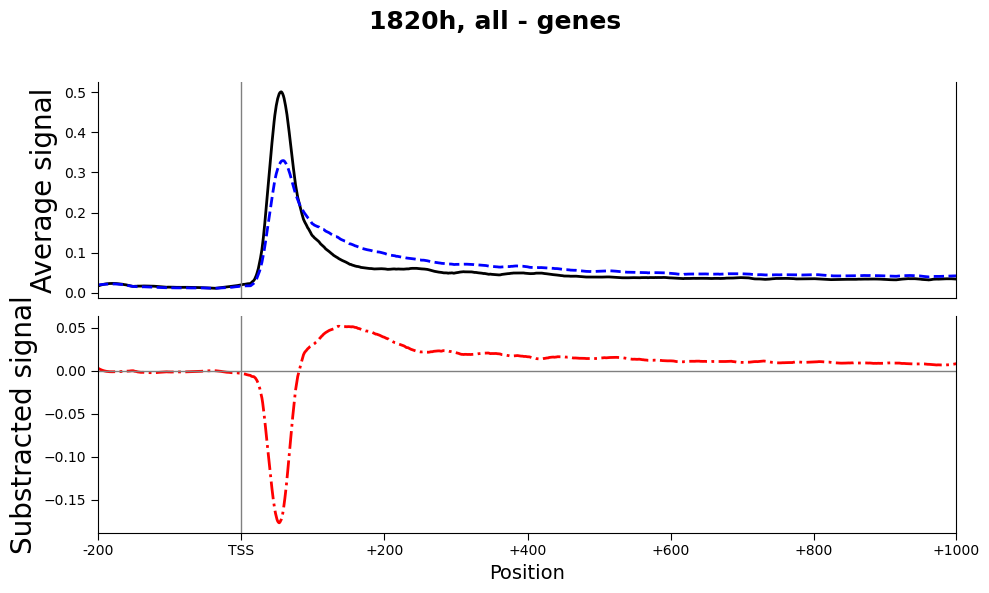

In [24]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import json
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams['font.family'] = 'DejaVu Sans' 

def smooth_signal(signal, window_size=51, poly_order=3):
        """Apply Savitzky-Golay filter for smoothing."""
        return savgol_filter(signal, window_size, poly_order)
    
def load_matrix_data(matrix_path):
    """Load matrix data and header information from the gzipped file."""
    with gzip.open(matrix_path, 'rt') as f:
        header = f.readline()  # First line is the header

    header_data = json.loads(header.strip('@'))  # Remove '@' and parse JSON

    # Extract sample labels and boundaries
    sample_labels = header_data["sample_labels"]
    sample_boundaries = header_data["sample_boundaries"]
    group_labels = header_data["group_labels"]
    group_boundaries = header_data["group_boundaries"]
    
    # Load the actual matrix data
    matrix_df = pd.read_csv(matrix_path, sep='\t', compression='gzip', skiprows=1, header=None)

    return matrix_df, sample_labels, sample_boundaries


def split_samples(matrix_df, sample_labels, sample_boundaries):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    # Extract the first six columns for gene metadata
    gene_metadata = matrix_df.iloc[:, :6]
    
    dark_df = pd.DataFrame()
    blue_light_df_2h = pd.DataFrame()

    for i, sample in enumerate(sample_labels):
        start_idx = sample_boundaries[i]
        end_idx = sample_boundaries[i + 1] if i + 1 < len(sample_boundaries) else None

        # Split columns based on sample type
        if "dark" in sample:
            dark_df = matrix_df.iloc[:, start_idx+6:end_idx+6]
        elif "BL2h" in sample:
            blue_light_df_2h = matrix_df.iloc[:, start_idx+6:end_idx+6]

    # Assign column names for clarity
    dark_df.columns = [f'{i}' for i in range(dark_df.shape[1])]
    blue_light_df_2h.columns = [f'{i}' for i in range(blue_light_df_2h.shape[1])]


    return dark_df, blue_light_df_2h

def extract_time_range_from_path(matrix_path):
    """
    Extract the time range (e.g., '18-20h') from the matrix path.
    """
    match = re.search(r'(\d{1,2}-\d{1,2}h)', matrix_path)
    if match:
        return match.group(1)
    return "Unknown"

def extract_title_from_filename(matrix_path):
    """Extract and format the plot title from the matrix file path."""
    filename = os.path.basename(matrix_path)
    parts = filename.split('_')
    time_point = parts[1]   # time of depletion eg.: '18-20h'
    depletion = parts[2]    # duration of depletion eg.: '4hdepletion'
    antibody = parts[3]     # antibody eg.: 'SPT5' 
    formatted_depletion = depletion.replace('depletion', 'depletion').replace('h', 'h ')
    final_title = f'{time_point}, {formatted_depletion} - {antibody}'
    return final_title

def plot_data(dark_avg, blue_light_avg_2h,  delta_avg_1h, output_path, plot_title):
    """Plot the averaged data in two subplots, with Deltas on top, and save the figure."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    x = range(1200) 
    line_width = 2
    frontSize_add = -2

    # First subplot (top): Dark, Blue Light 1h, and Blue Light 3h
    ax1.plot(x, dark_avg, label='Dark', color='black', linewidth=line_width)
    ax1.plot(x, blue_light_avg_2h, label='Blue Light 1h', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax1.set_ylabel('Average signal', fontsize=22 + frontSize_add)
    
    ax1.set_xticks([0, 200, 400, 600,800, 1000, 1199]) #199, 298, 397, 496,
    ax1.set_xticklabels(['-200', 'TSS', '+200', '+400', '+600', '+800', '+1000'], fontsize=20 + frontSize_add) 
    
    # Set tick size for both x and y axis 
    ax1.tick_params(axis='x', length=10)  
    ax1.tick_params(axis='y', length=10)  # 

    #ax1.set_xlim(0, 695)
    ax1.set_xlim(min(x), max(x))
    ax2.set_xlim(min(x), max(x))

    
    # Second subplot (bottom): Delta 1h, and Delta 3h
    ax2.plot(x, delta_avg_1h, label='Delta (BL 2h - Dark)', color='red', linestyle='-.', linewidth=line_width, markeredgecolor='black')
    ax2.tick_params(axis='y', labelsize=10)
    ax1.axvline(x=200, color='grey', linestyle='-', linewidth=1)  
    ax2.axvline(x=200, color='grey', linestyle='-', linewidth=1)  
    ax2.axhline(y=0, color='grey', linestyle='-', linewidth=1)  
    ax2.set_ylabel('Substracted signal', fontsize=22 + frontSize_add)
    ax2.set_xlabel('Position', fontsize=16 + frontSize_add)
        

    # Adjust appearance
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    # Add title above the subplots
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')
    ax1.tick_params(axis='x', length=0)  
    ax1.tick_params(axis='y', length=5) 
    ax2.tick_params(axis='x', length=5)  
    ax2.tick_params(axis='y', length=5) 
    
    # Save plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.savefig(output_path)
    plt.show()
    plt.close()

def smooth_signal(signal, window_size=51, poly_order=3):
        """Apply Savitzky-Golay filter for smoothing."""
        return savgol_filter(signal, window_size, poly_order)
    
def plot_SPT5_metaprofile(matrix_path_1h, output_path_base):
    # Load data for 1h matrix
    matrix_df_1h, sample_labels_1h, sample_boundaries_1h = load_matrix_data(matrix_path_1h)
    
    dark_df, blue_light_df_2h = split_samples(matrix_df_1h, sample_labels_1h, sample_boundaries_1h) 

    # Durchschnitt nur für Werte ohne NaN berechnen
    dark_avg = dark_df.apply(lambda col: np.nanmean(col), axis=0)
    blue_light_avg_2h = blue_light_df_2h.apply(lambda col: np.nanmean(col), axis=0)
    
    delta_df = blue_light_avg_2h - dark_df
    delta_avg = delta_df.apply(lambda col: np.nanmean(col), axis=0)

    # Extract title from first matrix
    plot_title = extract_title_from_filename(matrix_path_1h) 

    # Extract title from the matrix path
    time_range = extract_time_range_from_path(matrix_path_1h)

    dark_avg_smoothed = smooth_signal(dark_avg)
    blue_light_avg_2h = smooth_signal(blue_light_avg_2h)
    delta_avg_smoothed = smooth_signal(delta_avg)

    # Plot data
    plot_data(dark_avg_smoothed, blue_light_avg_2h, 
              delta_avg_smoothed, 
              output_path_base, plot_title)

    return 
    

directory = "/g/furlong/project/92_SPT4_SPT5/PROseq/analysis/deeptools_1bpBins/adapted/"
matrix_path_PROseq = directory + "PROseq_1820h_all_genes_active_TSS_1kbp_1bpBins_TSS_NaN.gz"
output_path_PROseq = "/home/mayer/92_SPT4_SPT5/Manuscript/Figures/Figure_5/Figure_5_C_PROseq_1820h_all_genes_active_smoothed.pdf"

plot_SPT5_metaprofile(matrix_path_PROseq, output_path_PROseq)

### Fig 5D: metaprofiles up/down/unchanged TSS-TES

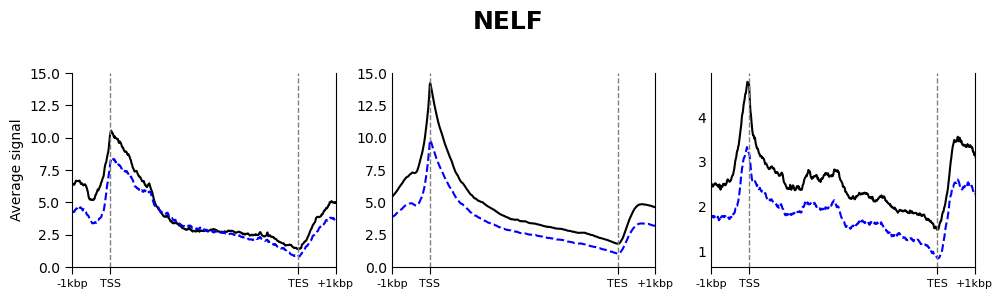

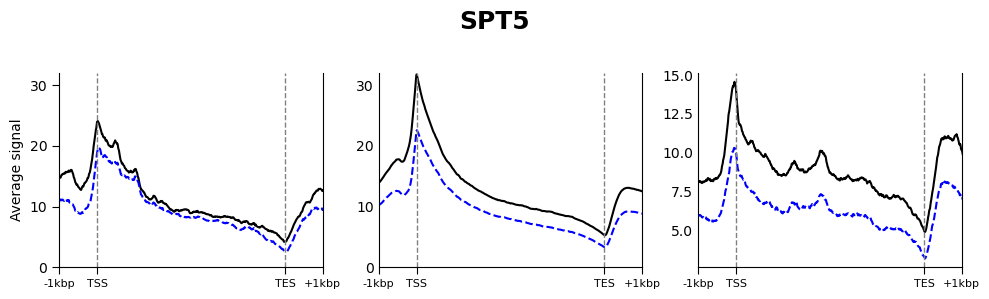

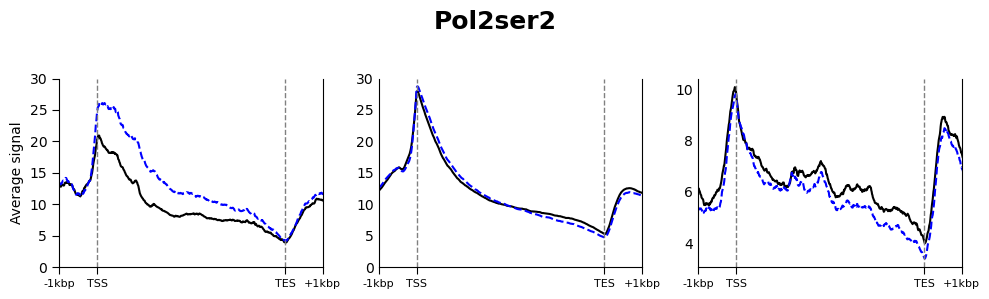

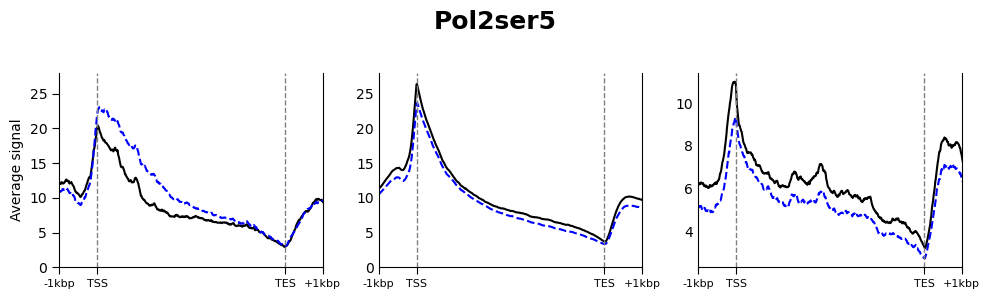

In [13]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import json
import os
import numpy as np
from tqdm import tqdm  # For progress tracking


def load_matrix_data(matrix_path):
    """Load matrix data and header information from the gzipped file."""
    with gzip.open(matrix_path, 'rt') as f:
        header = f.readline()  # First line is the header

    header_data = json.loads(header.strip('@'))  # Remove '@' and parse JSON

    # Extract sample labels and boundaries
    sample_labels = header_data["sample_labels"]
    sample_boundaries = header_data["sample_boundaries"]
    group_boundaries = header_data["group_boundaries"]
    group_labels = header_data["group_labels"]

    # Load the actual matrix data
    matrix_df = pd.read_csv(matrix_path, sep='\t', compression='gzip', skiprows=1, header=None)

    return matrix_df, sample_labels, sample_boundaries, group_labels, group_boundaries


def split_groups(matrix_df, group_labels, group_boundaries):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    # Extract the first six columns for gene metadata
    
    up_df = pd.DataFrame()
    unchanged_df = pd.DataFrame()
    down_df = pd.DataFrame()

    for i, group in enumerate(group_labels):
        start_idx = group_boundaries[i]
        end_idx = group_boundaries[i + 1] if i + 1 < len(group_boundaries) else None
        # Split columns based on sample type
        if "up" in group:
            up_df = matrix_df.iloc[start_idx:end_idx, :]
        elif "unchanged" in group:
            unchanged_df = matrix_df.iloc[start_idx:end_idx, :]
        elif "down" in group:
            down_df = matrix_df.iloc[start_idx:end_idx, :]

    # Assign column names for clarity
    up_df.columns = [f'{i}' for i in range(up_df.shape[1])]
    unchanged_df.columns = [f'{i}' for i in range(unchanged_df.shape[1])]
    down_df.columns = [f'{i}' for i in range(unchanged_df.shape[1])]
    
    return up_df, unchanged_df, down_df


def split_samples(matrix_df, sample_labels, sample_boundaries):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    # Extract the first six columns for gene metadata
    gene_metadata = matrix_df.iloc[:, :6]
    
    dark_df = pd.DataFrame()
    blue_light_df = pd.DataFrame()

    for i, sample in enumerate(sample_labels):
        start_idx = sample_boundaries[i]
        end_idx = sample_boundaries[i + 1] if i + 1 < len(sample_boundaries) else None
        # Split columns based on sample type
        if "Dark" in sample:
            dark_df = matrix_df.iloc[:, start_idx+6:end_idx+6]
        elif "BlueLight" in sample:
            blue_light_df = matrix_df.iloc[:, start_idx+6:end_idx+6]

    # Assign column names for clarity
    dark_df.columns = [f'{i}' for i in range(dark_df.shape[1])]
    blue_light_df.columns = [f'{i}' for i in range(blue_light_df.shape[1])]
    
    # Get average dark and blue light values for difference plotting
    dark_avg = dark_df.apply(lambda col: np.nanmean(col), axis=0)
    blue_light_avg = blue_light_df.apply(lambda col: np.nanmean(col), axis=0)
    
    return dark_avg, blue_light_avg

 

def extract_title_from_filename(matrix_path):
    """Extract and format the plot title from the matrix file path."""
    filename = os.path.basename(matrix_path)
    parts = filename.split('_')
    time_point = parts[1]   # time of depletion eg.: '18-20h'
    depletion = parts[2]    # duration of depletion eg.: '4hdepletion'
    antibody = parts[3]     # antibody eg.: 'SPT5' 
    formatted_depletion = depletion.replace('depletion', 'depletion').replace('h', 'h ')
    final_title = f'{time_point}, {formatted_depletion} - {antibody}'
    return final_title

#dark_avg, blue_light_avg, output_path, plot_title
def plot_data(up_dark, up_bluelight, unchanged_dark, unchanged_bluelight, down_dark, down_bluelight, output_path, plot_title, limit):
    """Plot the averaged data in two subplots, with Deltas on top, and save the figure."""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharey=False)
    #print(f"for {plot_title}: {len(up_dark)} up and {len(unchanged_dark)} unchanged and {len(down_dark)}")
    
    x = range(len(up_dark))
    line_width = 1.5
    frontSize_add = -12

    ax1.set_ylabel('Average signal', fontsize=22 + frontSize_add)
    
    ax1.plot(x, up_dark, label='Dark', color='black', linestyle='-', linewidth=line_width)
    ax1.plot(x, up_bluelight, label='Blue Light', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax1.set_xticks([0, 100, 596, 695]) #199, 298, 397, 496,
    ax1.set_xticklabels(['-1kbp', 'TSS', 'TES', '+1kbp'], fontsize=20 + frontSize_add) 
    ax1.tick_params(axis='x', length=5)  # Adjust length to your desired size
    ax1.tick_params(axis='y', length=5)  # Adjust length to your desired size
    ax1.axvline(x=100, color='grey', linestyle='--', linewidth=1)  # TSS center
    ax1.axvline(x=596, color='grey', linestyle='--', linewidth=1)  # TES center
    ax1.set_xlim(0, 695)
    ax1.set_ylim(0, limit)
    
    ax2.plot(x, unchanged_dark, label='Dark', color='black', linestyle='-', linewidth=line_width)
    ax2.plot(x, unchanged_bluelight, label='Blue Light', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax2.set_xticks([0, 100, 596, 695]) #199, 298, 397, 496,
    ax2.set_xticklabels(['-1kbp', 'TSS', 'TES', '+1kbp'], fontsize=20 + frontSize_add) 
    ax2.tick_params(axis='x', length=5)  # Adjust length to your desired size
    ax2.tick_params(axis='y', length=0)  # Adjust length to your desired size
    ax2.axvline(x=100, color='grey', linestyle='--', linewidth=1)  # TSS center
    ax2.axvline(x=596, color='grey', linestyle='--', linewidth=1)  # TES center
    ax2.set_xlim(0, 695)
    ax2.set_ylim(0, limit)
    
    ax3.plot(x, down_dark, label='Dark', color='black', linestyle='-', linewidth=line_width)
    ax3.plot(x, down_bluelight, label='Blue Light', color='blue', linestyle='--', linewidth=line_width, markeredgecolor='black')
    ax3.set_xticks([0, 100, 596, 695]) #199, 298, 397, 496,
    ax3.set_xticklabels(['-1kbp', 'TSS', 'TES', '+1kbp'], fontsize=20 + frontSize_add) 
    ax3.tick_params(axis='x', length=5)  # Adjust length to your desired size
    ax3.tick_params(axis='y', length=0)  # Adjust length to your desired size
    ax3.axvline(x=100, color='grey', linestyle='--', linewidth=1)  # TSS center
    ax3.axvline(x=596, color='grey', linestyle='--', linewidth=1)  # TES center
    ax3.set_xlim(0, 695)
      

    # Adjust appearance
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')
    ax1.spines['top'].set_visible(False)
    ax2.set_facecolor('white')
    ax2.spines['top'].set_visible(False)
    ax3.set_facecolor('white')
    ax3.spines['top'].set_visible(False)
    
    # Add title above the subplots
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')

    # Save plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for title
    plt.savefig(output_path)
    plt.show()
    plt.close()


def main(matrix_path, output_path, plot_title, limit):
    # Load data for 1h matrix, limit
    matrix_df, sample_labels, sample_boundaries, group_labels, group_boundaries = load_matrix_data(matrix_path)
    up_df, unchanged_df, down_df = split_groups(matrix_df, group_labels, group_boundaries)
    
    up_dark, up_bluelight = split_samples(up_df, sample_labels, sample_boundaries)
    unchanged_dark, unchanged_bluelight = split_samples(unchanged_df, sample_labels, sample_boundaries)
    down_dark, down_bluelight = split_samples(down_df, sample_labels, sample_boundaries)


    # Plot data
    plot_data(up_dark, up_bluelight, unchanged_dark, unchanged_bluelight, down_dark, down_bluelight, output_path, plot_title, limit)

    
plot_dir = "/g/furlong/project/92_SPT4_SPT5/Manuscript/Figures/Figure_5/"
directory = "/g/furlong/project/92_SPT4_SPT5/Depletion_CUTnTag/analysis/depletion_heatmap/genes_up_down_rna/significant/grouped_sorted_center/"
# BL18-20h, 2h
matrix_path_SPT5_BL1820 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion_matched_4h_RNAseq.NELF_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1820 = plot_dir + "Figure_5_D_BL18-20h_2hdepletion_NELF_metaprofiles_RNA_categories_scaled.pdf"

main(matrix_path_SPT5_BL1820, output_path_SPT5_BL1820, plot_title="NELF", limit=15)


# BL18-20h, 2h
matrix_path_SPT5_BL1820 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion_matched_4h_RNAseq.SPT5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1820 = plot_dir + "Figure_5_D_BL18-20h_2hdepletion_SPT5_metaprofiles_RNA_categories_scaled.pdf"

main(matrix_path_SPT5_BL1820, output_path_SPT5_BL1820, plot_title="SPT5", limit=32)


# BL18-20h, 2h
matrix_path_SPT5_BL1820 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion_matched_4h_RNAseq.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1820 = plot_dir + "Figure_5_D_BL18-20h_2hdepletion_Pol2ser2_metaprofiles_RNA_categories_scaled.pdf"

main(matrix_path_SPT5_BL1820, output_path_SPT5_BL1820, plot_title="Pol2ser2", limit=30)


# BL18-20h, 2h
matrix_path_SPT5_BL1820 = directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion_matched_4h_RNAseq.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn.gz"
output_path_SPT5_BL1820 = plot_dir + "Figure_5_D_BL18-20h_2hdepletion_Pol2ser5_metaprofiles_RNA_categories_scaled.pdf"

main(matrix_path_SPT5_BL1820, output_path_SPT5_BL1820, plot_title="Pol2ser5", limit=28)

Set bins after TES to 0 for log2FC plotting

In [16]:
import pandas as pd
import numpy as np
import gzip
from tqdm import tqdm  # For progress tracking

#############################################################
### Script for taking TSS centered deeptools heatmaps 
###     set bins to 0 after TES 
#############################################################

def process_matrix_single_log2FC(input_file, output_file):
    """
    Process a gene expression matrix by setting all values beyond the TES (Transcription End Site) to zero.
    
    Args:
        input_file (str): Path to the input .gz matrix file.
        output_file (str): Path to save the modified .gz matrix file.
    """
    # Open the .gz file and load the matrix
    with gzip.open(input_file, 'rt') as f:
        # Read the first line (header)
        header = f.readline().strip()
        
        # Load the remaining data into a DataFrame
        df = pd.read_csv(f, sep="\t", header=None)

    # Iterate over each gene (row) in the DataFrame
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing genes"):
        gene_start = int(row[1])  # Gene start position
        gene_end = int(row[2])    # Gene end position
        
        # Calculate the gene length
        gene_length = gene_end - gene_start
        
        # Calculate the TES position
        tes_position = gene_end
        
        # Determine the bin corresponding to the TES position (10 bp per bin)
        # Assumes positions are in bp, bins span -1000 bp to +5000 bp around TSS
        tes_bin_index = (gene_length + 1000) // 10

        # Set all values after the TES bin to 0 (bins after TES)
        if tes_bin_index < df.shape[1] - 6:  # Only affect bin columns
            df.iloc[index, tes_bin_index + 6:] = 0

    # Save the modified matrix to a new .gz file with the header
    with gzip.open(output_file, 'wt') as f_out:
        f_out.write(header + '\n')  # Write header to the output file
        df.to_csv(f_out, sep="\t", header=False, index=False)


def process_matrix_3h_comparison(input_file, output_file):
    """
    Process a 3-hour comparison matrix by setting all values beyond the TES to zero for both time points.

    Args:
        input_file (str): Path to the input .gz matrix file.
        output_file (str): Path to save the modified .gz matrix file.
    """
    # Open the .gz file and load the matrix
    with gzip.open(input_file, 'rt') as f:
        # Read the first line (header)
        header = f.readline().strip()
        
        # Load the remaining data into a DataFrame
        df = pd.read_csv(f, sep="\t", header=None)

    # Iterate over each gene (row) in the DataFrame
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing genes"):
        gene_start = int(row[1])  # Gene start position
        gene_end = int(row[2])    # Gene end position
        
        gene_length = gene_end - gene_start
        
        # Determine the bin corresponding to the TES position (10 bp per bin)
        tes_bin_index = (gene_length + 1000) // 10

        # Set values after the TES for both time points
        if tes_bin_index < 600:  # Only affect bin columns
            first_time_bin_start = tes_bin_index + 6
            first_time_bin_end = 6 + 600  # First time point ends at bin 600
            
            #second_time_bin_start = tes_bin_index + 6 + 600
            #second_time_bin_end = 6 + 1200  # Second time point ends at bin 1200

            # Set bins beyond TES to 0 for both time points
            df.iloc[index, first_time_bin_start:first_time_bin_end] = 0
            #df.iloc[index, second_time_bin_start:second_time_bin_end] = 0

    # Save the modified matrix to a new .gz file with the header
    with gzip.open(output_file, 'wt') as f_out:
        f_out.write(header + '\n')  # Write header to the output file
        df.to_csv(f_out, sep="\t", header=False, index=False)


directory = "/scratch/dulja/SPT5_spikein_CUTnTag/Depletion_CUTnTag/depletion_heatmap_matrices/genes_active/grouped_sorted_TSS/"
matrix_paths_BL1820_2h = {
    "NELF": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz",
    "SPT5": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz",
    "Pol2ser2": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz",
    "Pol2ser5": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC.gz"
}

output_paths_BL1820_2h = {
    "NELF": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.NELF_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz",
    "SPT5": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.SPT5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz",
    "Pol2ser2": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser2_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz",
    "Pol2ser5": directory + "heatmap_SPT5longLEXY_18-20h_2hdepletion.Pol2ser5_plotting_Dark_vs_BlueLight_SpikedIn_log2FC_TES0.gz"
}

for protein, input_path in matrix_paths_BL1820_2h.items():
   output_path = output_paths_BL1820_2h[protein]
   process_matrix_3h_comparison(input_path, output_path)


Processing genes: 100%|██████████| 10004/10004 [02:56<00:00, 56.71it/s] 


### Figure 5 E: PRO-seq TSS-TES scaled metaprofiles divided by dysregulation 

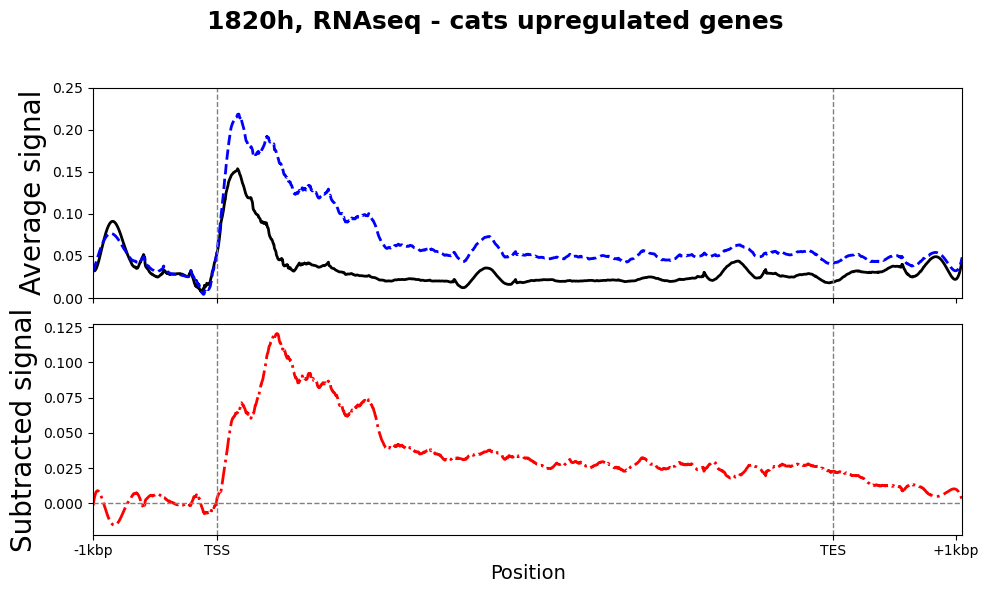

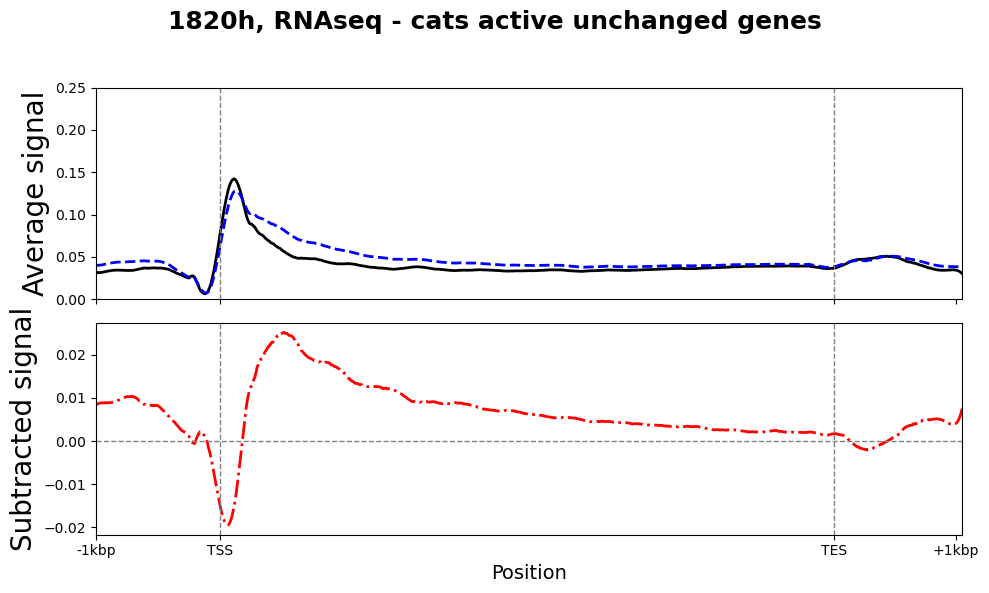

In [27]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import json
import re
import os
import numpy as np
from scipy.signal import savgol_filter

plt.rcParams['font.family'] = 'DejaVu Sans'

def load_matrix_data(matrix_path):
    """Load matrix data and header information from a gzipped file."""
    with gzip.open(matrix_path, 'rt') as f:
        header = f.readline().strip('@')  # Read and clean the header
    header_data = json.loads(header)  # Parse JSON header

    # Extract relevant information from the header
    sample_labels = header_data["sample_labels"]
    sample_boundaries = header_data["sample_boundaries"]
    
    # Load the matrix data
    matrix_df = pd.read_csv(matrix_path, sep='\t', compression='gzip', skiprows=1, header=None)

    return matrix_df, sample_labels, sample_boundaries


def split_samples(matrix_df, sample_labels, sample_boundaries, start_gene, end_gene):
    """Split the matrix into separate dataframes for Dark, Blue Light, and Log2FC."""
    gene_metadata = matrix_df.iloc[:, :6]  # Extract first six columns as gene metadata
    
    # Initialize empty DataFrames for different conditions
    dark_df, blue_light_df_1h, blue_light_df_3h = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    # Split the matrix based on sample boundaries
    for i, sample in enumerate(sample_labels):
        start_idx = sample_boundaries[i]
        end_idx = sample_boundaries[i + 1] if i + 1 < len(sample_boundaries) else None
        if "dark" in sample:
            dark_df = matrix_df.iloc[start_gene:end_gene, start_idx+6:end_idx+6]
        elif "BL2h" in sample:
            blue_light_df_1h = matrix_df.iloc[start_gene:end_gene, start_idx+6:end_idx+6]

    # Set column names for clarity
    dark_df.columns = [f'{i}' for i in range(dark_df.shape[1])]
    blue_light_df_1h.columns = [f'{i}' for i in range(blue_light_df_1h.shape[1])]
    
    return dark_df, blue_light_df_1h, blue_light_df_3h

def extract_title_from_filename(matrix_path):
    """Extract and format the plot title from the matrix file path."""
    filename = os.path.basename(matrix_path)
    parts = filename.split('_')
    time_point, depletion, antibody = parts[1], parts[2], parts[3]
    formatted_depletion = depletion.replace('depletion', 'depletion').replace('h', 'h ')
    return f'{time_point}, {formatted_depletion} - {antibody}'

def plot_data(dark_avg, blue_light_avg_1h, delta_avg_1h, output_path, plot_title, limit=0):
    """Plot the averaged data in two subplots and save the figure."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    x = range(7000)
    line_width = 2
    front_size = -2

    # First subplot (top): Plot Dark and Blue Light 1h
    ax1.plot(x, dark_avg, label='Dark', color='black', linewidth=line_width)
    ax1.plot(x, blue_light_avg_1h, label='Blue Light 1h', color='blue', linestyle='--', linewidth=line_width)
    ax1.set_ylabel('Average signal', fontsize=22 + front_size)
    if limit != 0:
        ax1.set_ylim(0, limit)

    # Set labels and ticks for the x-axis
    ax1.set_xticks([0, 1000, 5960, 6950])
    ax1.set_xticklabels(['-1kbp', 'TSS', 'TES', '+1kbp'], fontsize=20 + front_size)
    ax1.axvline(x=1000, color='grey', linestyle='--', linewidth=1)  # TSS line
    ax1.axvline(x=5960, color='grey', linestyle='--', linewidth=1)  # TES line
    ax1.set_xlim(min(x), max(x))

    # Second subplot (bottom): Plot Delta values
    ax2.plot(x, delta_avg_1h, label='Delta (BL 1h - Dark)', color='red', linestyle='-.', linewidth=line_width)
    ax2.axvline(x=1000, color='grey', linestyle='--', linewidth=1)  # TSS line
    ax2.axvline(x=5960, color='grey', linestyle='--', linewidth=1)  # TES line
    ax2.axhline(y=0, color='grey', linestyle='--', linewidth=1)  # Zero line
    ax2.set_ylabel('Subtracted signal', fontsize=22 + front_size)
    ax2.set_xlabel('Position', fontsize=16 + front_size)

    # Adjust appearance and layout
    fig.suptitle(plot_title, fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(output_path)
    plt.show()

def smooth_signal(signal, window_size=501, poly_order=5):
    """Apply Savitzky-Golay filter for smoothing."""
    return savgol_filter(signal, window_size, poly_order)
    
def plot_SPT5_metaprofile(matrix_path_1h, output_path_base, limit=0):
    """Plot the SPT5 metaprofile using data from the 1h matrix."""
    matrix_df_1h, sample_labels_1h, sample_boundaries_1h = load_matrix_data(matrix_path_1h)

    # Split the data for the bottom part (0-123)
    dark_df_1h, blue_light_df_1h, _ = split_samples(matrix_df_1h, sample_labels_1h, sample_boundaries_1h, 0, 123)
    dark_avg = dark_df_1h.apply(np.nanmean, axis=0)
    blue_light_avg_1h = blue_light_df_1h.apply(np.nanmean, axis=0)
    
    delta_df_1h = blue_light_df_1h - dark_df_1h
    delta_avg_1h = delta_df_1h.apply(np.nanmean, axis=0)

    # Extract title and smooth signals
    plot_title = extract_title_from_filename(matrix_path_1h) + " upregulated genes"
    dark_avg_smoothed = smooth_signal(dark_avg)
    blue_light_avg_1h_smoothed = smooth_signal(blue_light_avg_1h)
    delta_avg_1h_smoothed = smooth_signal(delta_avg_1h)

    output_path = output_path_base + "_upregulated.pdf"
    
    # Plot and save the figure
    plot_data(dark_avg_smoothed, blue_light_avg_1h_smoothed, delta_avg_1h_smoothed, output_path, plot_title, limit=0.25)

    # Split the data for the middle part (123-6925)
    dark_df_1h, blue_light_df_1h, _ = split_samples(matrix_df_1h, sample_labels_1h, sample_boundaries_1h, 123, 6925)
    dark_avg = dark_df_1h.apply(np.nanmean, axis=0)
    blue_light_avg_1h = blue_light_df_1h.apply(np.nanmean, axis=0)
    
    delta_df_1h = blue_light_df_1h - dark_df_1h
    delta_avg_1h = delta_df_1h.apply(np.nanmean, axis=0)

    # Extract title and smooth signals
    plot_title = extract_title_from_filename(matrix_path_1h) + " active unchanged genes"
    dark_avg_smoothed = smooth_signal(dark_avg)
    blue_light_avg_1h_smoothed = smooth_signal(blue_light_avg_1h)
    delta_avg_1h_smoothed = smooth_signal(delta_avg_1h)

    output_path = output_path_base + "_unchanged.pdf"
    
    # Plot and save the figure
    plot_data(dark_avg_smoothed, blue_light_avg_1h_smoothed, delta_avg_1h_smoothed, output_path, plot_title, limit=0.25)

    
directory = "/g/furlong/project/92_SPT4_SPT5/PROseq/analysis/deeptools_1bpBins/"
matrix_path_PROseq = directory + "PROseq_1820h_RNAseq_cats_18_20h_2h_TSS_TES_1bpBins.gz"
output_path_PROseq = "/home/mayer/92_SPT4_SPT5/Manuscript/Figures/Figure_5/Figure_5_E_metaprofile_PROseq"

plot_SPT5_metaprofile(matrix_path_PROseq, output_path_PROseq)